#### Import Libraries

In [83]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
#from catboost import CatBoostRegressor
import lightgbm as LGB
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


### Load Data Sets

In [84]:

# Load data set
housing_price_df = pd.read_csv("https://raw.githubusercontent.com/josephjaiyeola/housing_price_predict/main/data/Housing.csv")
housing_price_df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [85]:
# See the data type and if there are any null value
housing_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [86]:
# Find the decriptive statistics of the numerical variables
housing_price_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [87]:
#check if there is null values
housing_price_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [88]:
#Check if there is duplicates in the column
housing_price_df.duplicated().sum()

0

In [89]:
#Check the correlation between data
housing_price_df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [90]:
#create a copy of the data frame
data = housing_price_df.copy()
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Data Visualization

#### Bar Plot

<AxesSubplot:xlabel='airconditioning', ylabel='bedrooms'>

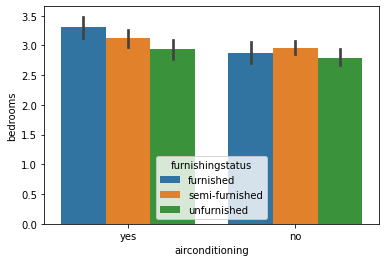

In [91]:
#Create a bar plot airconditioning and number bedrooms and then group it by furnishing status
sns.barplot(x=housing_price_df['airconditioning'], y = housing_price_df['bedrooms'], hue =housing_price_df['furnishingstatus'])

<AxesSubplot:xlabel='hotwaterheating', ylabel='bathrooms'>

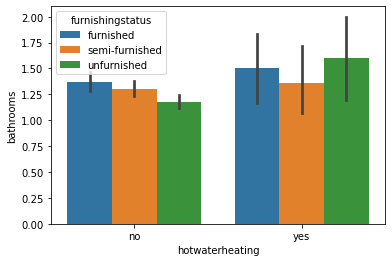

In [92]:
#Create a bar plot hotwaterheating and number bathrooms and then group it by furnishing status
sns.barplot(x= housing_price_df['hotwaterheating'], y = housing_price_df['bathrooms'], hue= housing_price_df['furnishingstatus'])


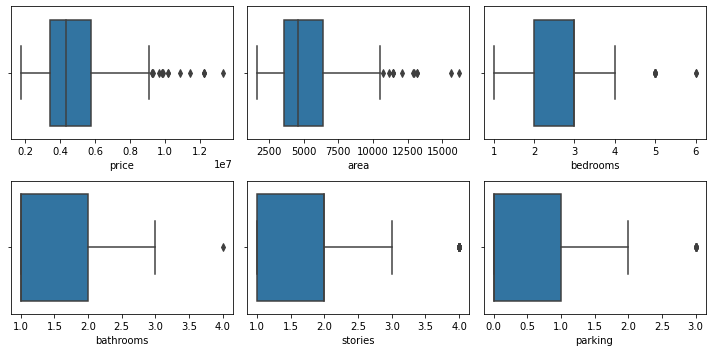

In [93]:
#Show a box plot of top numerical variables
fig, axs = plt.subplots(2,3, figsize =(10,5))
plt1 = sns.boxplot(housing_price_df['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing_price_df['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing_price_df['bedrooms'], ax =axs[0,2])
plt4 = sns.boxplot(housing_price_df['bathrooms'], ax=axs[1,0])
plt5 = sns.boxplot(housing_price_df['stories'], ax =axs[1,1])
plt6 = sns.boxplot(housing_price_df['parking'], ax=axs[1,2])

plt.tight_layout()

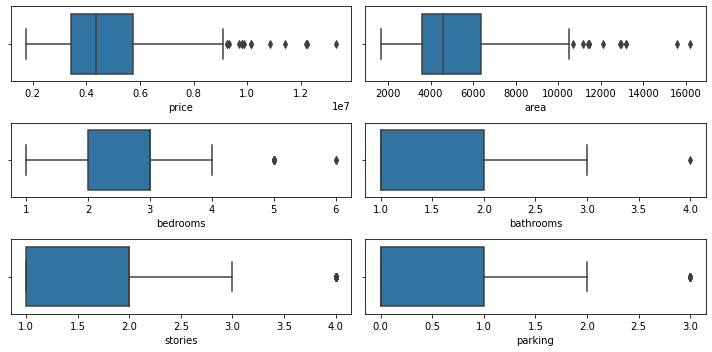

In [94]:
#Show a box plot of top numerical variables(another way)
fig, axs = plt.subplots(3, 2, figsize=(10, 5))

plt1 = sns.boxplot(housing_price_df['price'], ax=axs[0, 0])
plt2 = sns.boxplot(housing_price_df['area'], ax=axs[0, 1])
plt3 = sns.boxplot(housing_price_df['bedrooms'], ax=axs[1, 0])
plt4 = sns.boxplot(housing_price_df['bathrooms'], ax=axs[1, 1])
plt5 = sns.boxplot(housing_price_df['stories'], ax=axs[2, 0])
plt6 = sns.boxplot(housing_price_df['parking'], ax=axs[2, 1])

plt.tight_layout()
plt.show()

#### Dealing with outliers in the price

In [95]:
# Dealing with outliers in the price
# Get Q1 and Q3
Q1 = housing_price_df.price.quantile(0.25)
Q3 = housing_price_df.price.quantile(0.75)

# Find inter quartile range
IQR = Q3 - Q1

#Limit the data to remove outlier
housing_price_df = housing_price_df[(housing_price_df.price >= Q1 - 1.5*IQR) & (housing_price_df.price <= Q3 + 1.5*IQR)]
housing_price_df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7fa83d04f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7fa83c8dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7fa83d0190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7fa83c8580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7fa83c8eb0>],
 'means': []}

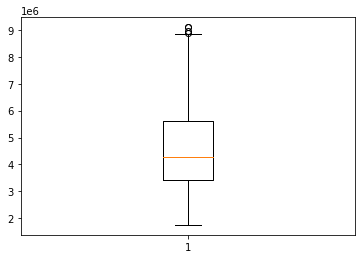

In [96]:
#checking for the out
plt.boxplot(housing_price_df.price)

In [97]:
#check what the maximum value is
housing_price_df.price.max()

9100000

In [98]:
#addressing the outlier in the area
Q1 = housing_price_df.area.quantile(0.25)
Q3 = housing_price_df.area.quantile(0.75)

IQR = Q3 -Q1

housing_price_df= housing_price_df[(housing_price_df.area >= Q1 - 1.5*IQR) & (housing_price_df.area<= Q3 + 1.5*IQR)]
housing_price_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [99]:
#Check the maximum for the area
housing_price_df.area.max()


10360

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7fa85fc700>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7fa85f8a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7fa85fcbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7fa85f8bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7fa85f8730>],
 'means': []}

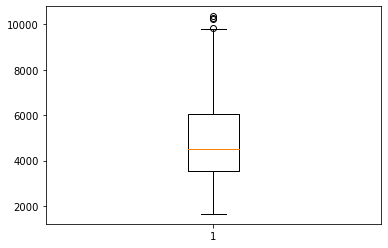

In [100]:
plt.boxplot(housing_price_df.area)

<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

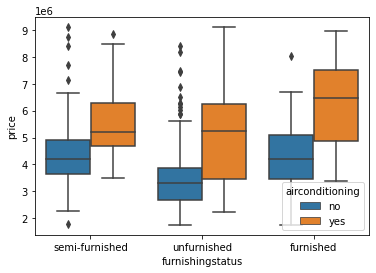

In [101]:
# A group boxplot on furnishing status(categorical) on price
sns.boxplot(x='furnishingstatus', y= 'price', hue = 'airconditioning', data = housing_price_df)

<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

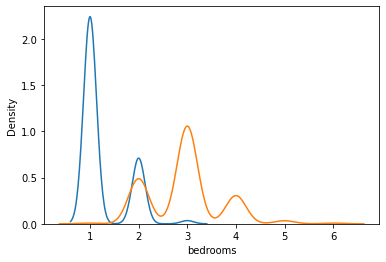

In [102]:
#Using a density plot to see the category distribution of bathrooms and bedrooms
sns.distplot(housing_price_df['bathrooms'], hist =False)
sns.distplot(housing_price_df['bedrooms'], hist = False)

#### Heatmap

<AxesSubplot:>

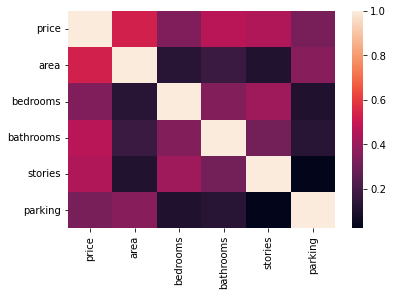

In [103]:
#To see the correlation of variables 
sns.heatmap(housing_price_df.corr())

#### Scatter Plot

<AxesSubplot:xlabel='area', ylabel='price'>

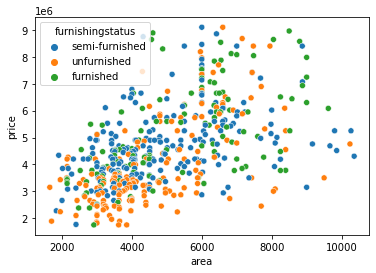

In [104]:
# More like a correlation scatter plot showing as price increase and showing the group by furnishing status 
sns.scatterplot(y=housing_price_df['price'], x = housing_price_df['area'], hue= housing_price_df['furnishingstatus'])

#### Pair Plot

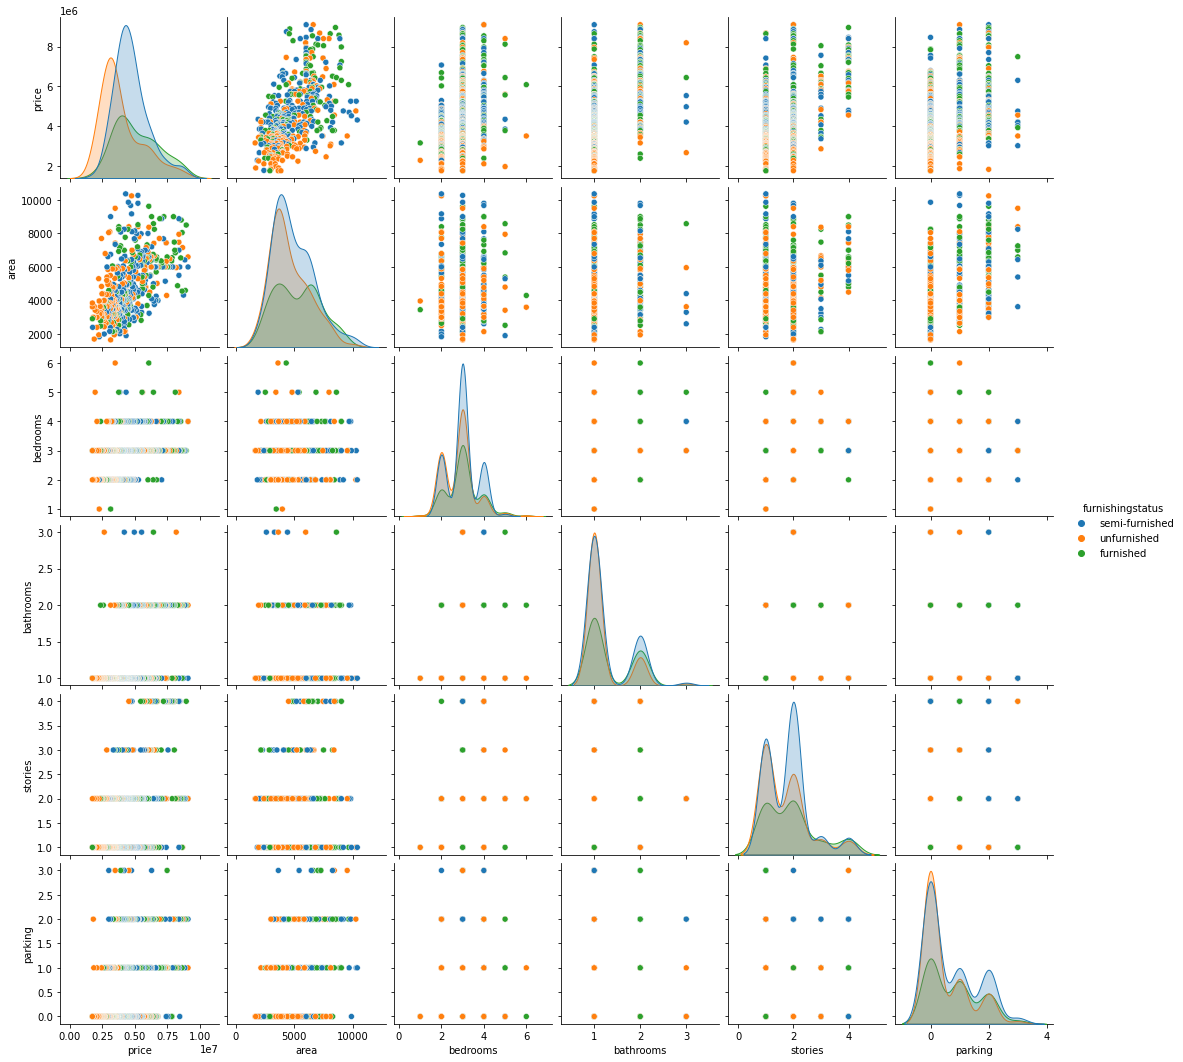

In [105]:
# vieing the visual correlation(scatter plot) of all the variables and see the group by furnishing status
sns.pairplot(housing_price_df, hue = 'furnishingstatus')

#### Feature Engineering

In [106]:
#This is to make the categorical variables all dummy variables and incase they are three levels it creates two dummy variables
# All you need is to specify for the categorical variables with strings

status = pd.get_dummies(data[['furnishingstatus', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first= True)

# merged the string data with the original data set
data = pd.concat([data, status], axis =1)

# drop the variables you already made dummy
data.drop(['furnishingstatus', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis =1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,0,0,1,1,1,0,1,0


In [107]:
housing_price_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [108]:
#create a new data frame and remove the price column
X = data.drop(['price'], axis = 1)

#create a new data frame for only the dependent variablwe
y = data['price']

# Do a 70% and 30% split of the two data frame and give a new name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Feature Scalling

In [109]:
#define the scaller
scaler = MinMaxScaler()

#scaler = StandardScaler()
scaler.fit(X_train)

#tring to scale the X_train column
X_train_scaled = scaler.transform(X_train)

In [110]:

model =  {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boosting Regressor' :GradientBoostingRegressor(),
    'XGBoost' :xgb.XGBRegressor(),
    'Support Vector regressor' : SVR(),
    'Lasso Reg': Lasso(),
    'Ridge': Ridge(),
    'LGBM Reg' : LGBMRegressor(),
    'Cat Boost': CatBoostRegressor()
}

In [111]:
#https://www.kaggle.com/code/goyaladi/house-prices-regression-analysis-eda